In [ ]:
import pandas as pd
from google.colab import files
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os
import shutil
import seaborn as sns

In [ ]:
project_name = 'course-project'

In [ ]:
! pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

In [ ]:
! kaggle datasets download -d praveengovi/coronahack-chest-xraydataset
! mkdir coronahack
! unzip coronahack-chest-xraydataset.zip -d coronahack/

In [ ]:
# Reading through the metadata
summary = pd.read_csv('/content/coronahack/Chest_xray_Corona_dataset_Summary.csv')
df = pd.read_csv('/content/coronahack/Chest_xray_Corona_Metadata.csv')

# Explore Data

In [ ]:
df.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


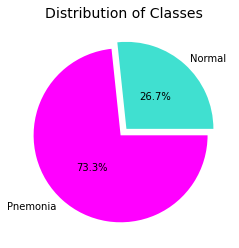

In [11]:
# Visualize Class Distribution as Pie Chart

colors = ['turquoise', 'magenta']
groupped_data = df.groupby("Label")["Label"].count()
labels = groupped_data.keys()

plt.pie(x=groupped_data, autopct="%.1f%%", explode=[0.05]*len(labels),
        colors=colors,
        labels=labels, pctdistance=0.5)
plt.title("Distribution of Classes", fontsize=14);

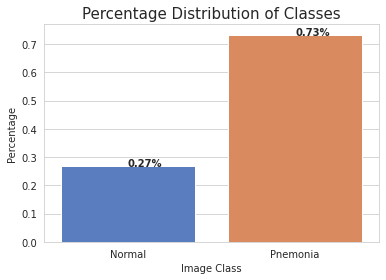

In [12]:
# Visualize Class Distribution Percentages as Bar Plot

pct_df = pd.DataFrame({'Percentage': df.groupby("Label").size() / len(df)})

sns.set_style("whitegrid")
ax = sns.barplot(x=pct_df.index, y='Percentage', data=pct_df, ci=None, palette="muted",orient='v', )
ax.set_title("Percentage Distribution of Classes", fontsize=15)
ax.set_xlabel ("Image Class")
ax.set_ylabel ("Percentage")
# calculate the percentages
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.2f%%"% rect.get_height(), weight='bold' )

In [13]:
replace_dict = {'Pnemonia':1,
                'Normal':0}
df['Label'] = df['Label'].replace(replace_dict)

train_df = df[df.Dataset_type=='TRAIN']
display(train_df.head())
test_df = df[df.Dataset_type=='TEST']
display(test_df.head())

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,0,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,0,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,0,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,0,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,0,TRAIN,NaN,NaN


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5286,5309,IM-0021-0001.jpeg,0,TEST,NaN,NaN
5287,5310,IM-0019-0001.jpeg,0,TEST,NaN,NaN
5288,5311,IM-0017-0001.jpeg,0,TEST,NaN,NaN
5289,5312,IM-0016-0001.jpeg,0,TEST,NaN,NaN
5290,5313,IM-0015-0001.jpeg,0,TEST,NaN,NaN


# Moving Images to Folders

In [14]:
# Inside the Pneumonia idagnosed data how many are covid positive
df_pneumonia = df[df.Label==1]
df_pneumonia_covid = df_pneumonia[df_pneumonia.Label_2_Virus_category=='COVID-19']
pneumonia_covid_images = df_pneumonia_covid.X_ray_image_name.values.tolist()

In [15]:
# Defining the path to Train and Test directories
training_data_path = '/content/coronahack/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'
testing_data_path = '/content/coronahack/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

In [16]:
# Funtions for Making nd Removing subdirectories
def create_dir():
    try:
        os.makedirs('/content/coronahack/working/train/Pneumonia')
        os.makedirs('/content/coronahack/working/train/Normal')
        os.makedirs('/content/coronahack/working/test/Pneumonia')
        os.makedirs('/content/coronahack/working/test/Normal')
    except:
        pass
def remove_dir():
    try:
        shutil.rmtree('/content/coronahack/working/train')
        shutil.rmtree('/content/coronahack/working/test')    
    except:
        pass

In [17]:
# Seperate dataframes for different labels in test and train
train_pneumonia_df = train_df[train_df.Label==1]
train_normal_df = train_df[train_df.Label==0]
test_pneumonia_df = test_df[test_df.Label==1]
test_normal_df = test_df[test_df.Label==0]

In [18]:
# Copying the files to newly created locations. You may use Flow from dataframe attribute and skip all these steps. But I prefer to use flow from directory 
remove_dir()
create_dir()

training_images_pneumonia = train_pneumonia_df.X_ray_image_name.values.tolist()
training_images_normal = train_normal_df.X_ray_image_name.values.tolist()
testing_images_pneumonia = test_pneumonia_df.X_ray_image_name.values.tolist()
testing_images_normal = test_normal_df.X_ray_image_name.values.tolist()

for image in training_images_pneumonia:
    train_image_pneumonia = os.path.join(training_data_path, str(image))
    shutil.copy(train_image_pneumonia, '/content/coronahack/working/train/Pneumonia')
    
for image in training_images_normal:
    train_image_normal = os.path.join(training_data_path, str(image))
    shutil.copy(train_image_normal, '/content/coronahack/working/train/Normal')
    
for image in testing_images_pneumonia:
    test_image_pneumonia = os.path.join(testing_data_path, str(image))
    shutil.copy(test_image_pneumonia, '/content/coronahack/working/test/Pneumonia')
    
for image in testing_images_normal:
    test_image_normal = os.path.join(testing_data_path, str(image))
    shutil.copy(test_image_normal, '/content/coronahack/working/test/Normal')

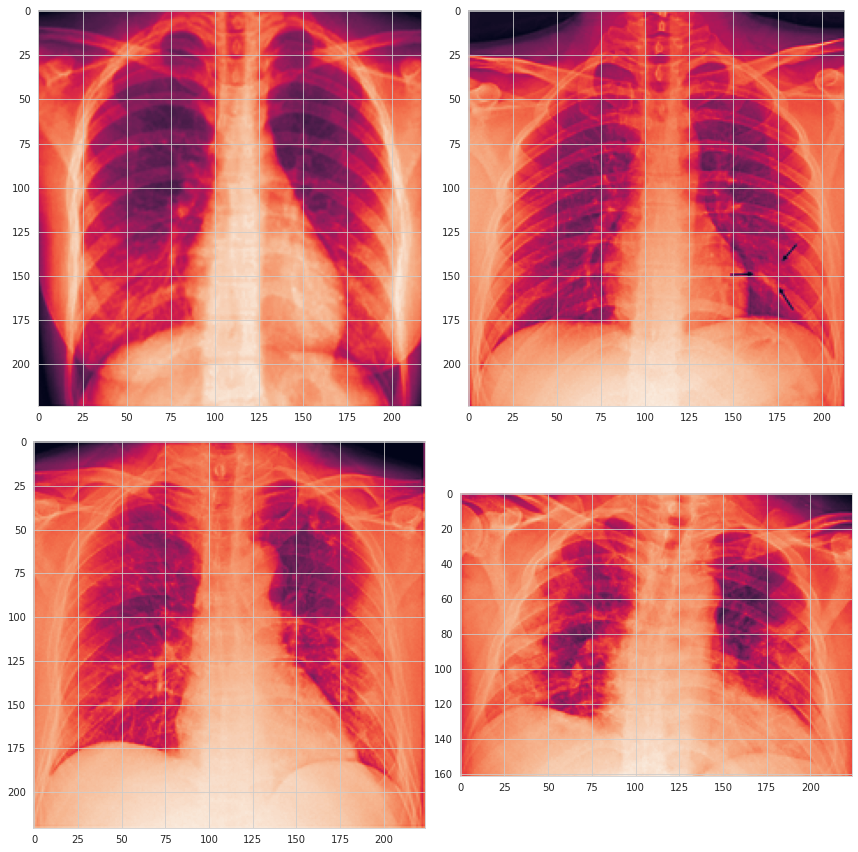

In [19]:
# Visualize first four images with Pneumonia

plt.figure(figsize=(12,12))
for index, fn in enumerate(pneumonia_covid_images[:4]):
    path = '/content/coronahack/working/train/Pneumonia/' + str(fn)
    image = Image.open(path)
    image = ImageOps.grayscale(image)
    image.thumbnail((224,224))
    plt.subplot(2,2,index+1)
    plt.imshow(image)

plt.tight_layout()

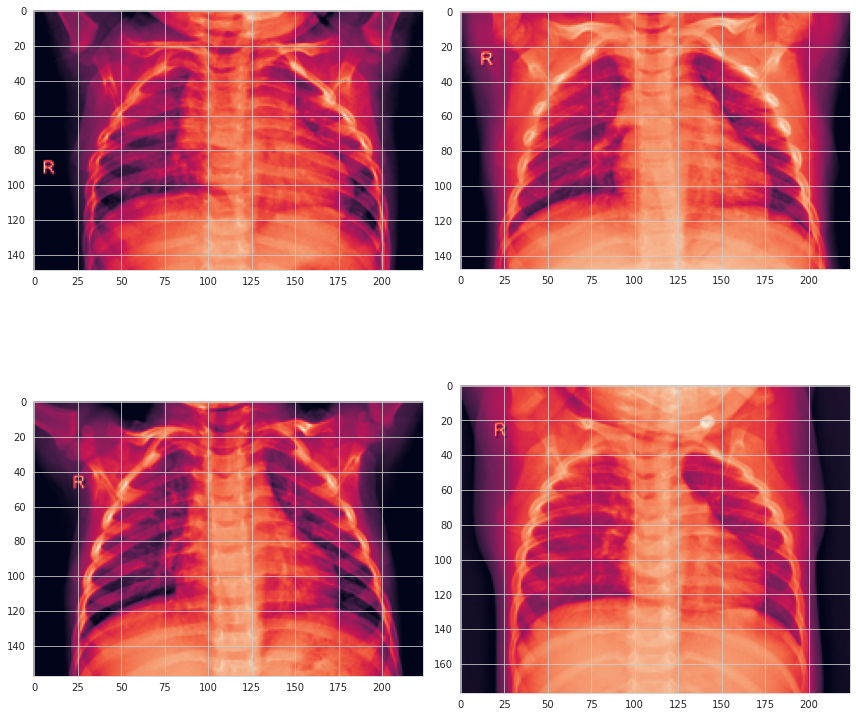

In [20]:
# Visualize first four normal images
plt.figure(figsize=(12,12))
for index, fn in enumerate(training_images_normal[:4]):
    path = '/content/coronahack/working/train/Normal/' + str(fn)
    image = Image.open(path)
    image = ImageOps.grayscale(image)
    image.thumbnail((224,224))
    plt.subplot(2,2,index+1)
    plt.imshow(image)

plt.tight_layout()

# Preparing Data for using with PyTorch

In [21]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torch
from torch.utils.data import random_split
import torchvision.transforms as tt
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
import torch.nn.functional as F
import numpy as np

In [22]:
dataset = ImageFolder('/content/coronahack/working/train', tt.ToTensor())
img, label = dataset[1000]
print(img.shape, label)

torch.Size([3, 1325, 1770]) 0


In [23]:
# Data transforms (normalization & data augmentation)

# pass list of transforms to tt.compose
train_tfms = tt.Compose([tt.RandomCrop(128, padding=15, padding_mode='reflect'),
                         tt.RandomHorizontalFlip(), 
                         tt.ToTensor()
                         ])

# Dont apply transformations to validation data, model needs normalized pixel values
valid_tfms = tt.Compose([tt.ToTensor()
                        ])

In [24]:
dataset = ImageFolder('/content/coronahack/working/train', train_tfms)

In [25]:
len(dataset)

5286

In [26]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 128, 128]) 0


tensor([[[0.4980, 0.4980, 0.4980,  ..., 0.3608, 0.3608, 0.3647],
         [0.4980, 0.4980, 0.4980,  ..., 0.3686, 0.3686, 0.3647],
         [0.5020, 0.5020, 0.4980,  ..., 0.3725, 0.3725, 0.3686],
         ...,
         [0.4510, 0.4510, 0.4510,  ..., 0.5059, 0.5059, 0.5059],
         [0.4549, 0.4549, 0.4549,  ..., 0.5059, 0.5059, 0.5059],
         [0.4510, 0.4549, 0.4549,  ..., 0.5059, 0.5059, 0.5059]],

        [[0.4980, 0.4980, 0.4980,  ..., 0.3608, 0.3608, 0.3647],
         [0.4980, 0.4980, 0.4980,  ..., 0.3686, 0.3686, 0.3647],
         [0.5020, 0.5020, 0.4980,  ..., 0.3725, 0.3725, 0.3686],
         ...,
         [0.4510, 0.4510, 0.4510,  ..., 0.5059, 0.5059, 0.5059],
         [0.4549, 0.4549, 0.4549,  ..., 0.5059, 0.5059, 0.5059],
         [0.4510, 0.4549, 0.4549,  ..., 0.5059, 0.5059, 0.5059]],

        [[0.4980, 0.4980, 0.4980,  ..., 0.3608, 0.3608, 0.3647],
         [0.4980, 0.4980, 0.4980,  ..., 0.3686, 0.3686, 0.3647],
         [0.5020, 0.5020, 0.4980,  ..., 0.3725, 0.3725, 0.

In [27]:
print(dataset.classes)

['Normal', 'Pneumonia']


In [28]:
random_seed = 42
torch.manual_seed(random_seed)

In [29]:
val_size = 500
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(4786, 500)

In [30]:
img, label = train_ds[0]
print(img.shape, label)
img

torch.Size([3, 128, 128]) 1


tensor([[[0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5686],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5725],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5608, 0.5608],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.5647, 0.5137, 0.4784],
         [0.0078, 0.0078, 0.0078,  ..., 0.5412, 0.5020, 0.4745],
         [0.0078, 0.0078, 0.0078,  ..., 0.5216, 0.5020, 0.4863]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5686],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5725],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5608, 0.5608],
         ...,
         [0.0078, 0.0078, 0.0078,  ..., 0.5647, 0.5137, 0.4784],
         [0.0078, 0.0078, 0.0078,  ..., 0.5412, 0.5020, 0.4745],
         [0.0078, 0.0078, 0.0078,  ..., 0.5216, 0.5020, 0.4863]],

        [[0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5686],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5686, 0.5725],
         [0.0118, 0.0118, 0.0078,  ..., 0.5647, 0.5608, 0.

In [31]:
batch_size=16

train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

In [32]:
for batch in val_ds:
  img, label = batch
  print(img.shape, label)
  break

torch.Size([3, 128, 128]) 1


# Using GPU

In [33]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [34]:
device = get_default_device()
device

device(type='cuda')

In [35]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(val_dl, device)

# Defining the model

In [36]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                   # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [37]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), # Prevents any specific channel from overly affecting gradients and output losses
              nn.ReLU(inplace=True)]  # Non-linearity
    if pool:
      layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet(ImageClassificationBase):
    # Common image classification infrastructure
    def __init__(self, in_channels, num_classes):
        super().__init__()
        # (batch size) x 3 x 256 x 256
        self.conv1 = conv_block(in_channels, 64)  # 64 x 256 x 256
        self.conv2 = conv_block(64, 128, pool=True)  # 128 x 128 x 128
        self.res1 = nn.Sequential(conv_block(128, 128),  
                                  conv_block(128, 128)) # 128 x 128 x 128
        
        self.conv3 = conv_block(128, 256, pool=True)  # 256 x 64 x 64
        self.conv4 = conv_block(256, 512, pool=True)  # 512 x 32 x 32
        self.conv5 = conv_block(512, 1024, pool=True)  # 512 x 16 x 16
        self.conv6 = conv_block(1024, 2048, pool=True)  # 512 x 8 x 8
        self.conv7 = conv_block(2048, 4096, pool=True)  # 512 x 4 x 4

        self.res2 = nn.Sequential(conv_block(4096, 4096),
                                  conv_block(4096, 4096))  # 512 x 4 x 4
        
        self.classifier = nn.Sequential(nn.MaxPool2d(2), # 512 x 1 x 1
                                        nn.Flatten(), # 512
                                        nn.Dropout(0.2),
                                        nn.Linear(4096, num_classes))  # 2
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.conv5(out)
        out = self.conv6(out)
        out = self.conv7(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [38]:
model = to_device(ResNet(3, 2), device)
# model

# Training model

In [39]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()  # remove stale data
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        print("Starting epoch: ")
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()  # calculate next learning rate
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [40]:
history = [evaluate(model, valid_dl)]
history

[{'val_acc': 0.772265613079071, 'val_loss': 0.6898050904273987}]

In [41]:
epochs = 8
# max_lr = 0.004
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [42]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Starting epoch: 
Epoch [0], last_lr: 0.00395, train_loss: 1.0373, val_loss: 7.4621, val_acc: 0.7625
Starting epoch: 
Epoch [1], last_lr: 0.00936, train_loss: 3.7123, val_loss: 828.5300, val_acc: 0.3668
Starting epoch: 
Epoch [2], last_lr: 0.00972, train_loss: 4.0418, val_loss: 198.2108, val_acc: 0.3285
Starting epoch: 
Epoch [3], last_lr: 0.00812, train_loss: 2.9577, val_loss: 2905.2131, val_acc: 0.2277
Starting epoch: 
Epoch [4], last_lr: 0.00556, train_loss: 2.1155, val_loss: 53.5698, val_acc: 0.6887
Starting epoch: 
Epoch [5], last_lr: 0.00283, train_loss: 1.7204, val_loss: 5.1313, val_acc: 0.7723
Starting epoch: 
Epoch [6], last_lr: 0.00077, train_loss: 1.2252, val_loss: 0.7386, val_acc: 0.7613
Starting epoch: 
Epoch [7], last_lr: 0.00000, train_loss: 1.1115, val_loss: 2.3527, val_acc: 0.7703
CPU times: user 12min 51s, sys: 11min 51s, total: 24min 43s
Wall time: 26min 43s


In [65]:
train_time = "26:43"

In [43]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

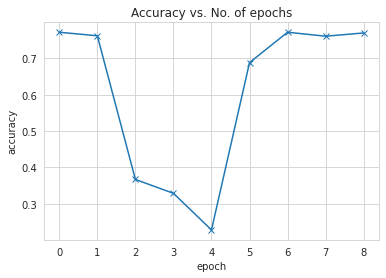

In [44]:
plot_accuracies(history)

In [45]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

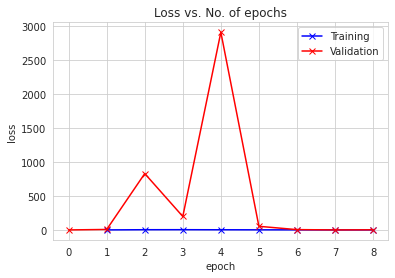

In [46]:
plot_losses(history)

In [47]:
def plot_lrs(history):
    lrs = np.concatenate([x.get('lrs', []) for x in history])
    plt.plot(lrs)
    plt.xlabel('Batch no.')
    plt.ylabel('Learning rate')
    plt.title('Learning Rate vs. Batch no.');

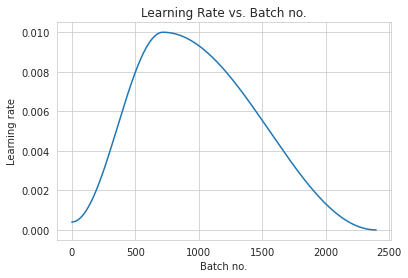

In [48]:
plot_lrs(history)

# Test with images

In [57]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Pneumonia , Predicted: Pneumonia


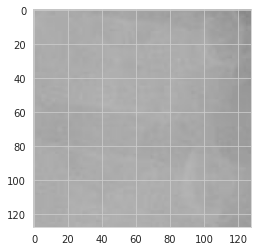

In [58]:
img, label = val_ds[0]
plt.imshow(img.permute(1, 2, 0).clamp(0, 1))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Pneumonia , Predicted: Pneumonia


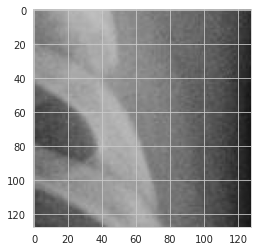

In [59]:
img, label = val_ds[302]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Pneumonia , Predicted: Pneumonia


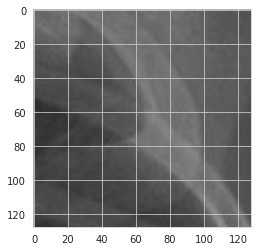

In [60]:
img, label = val_ds[19]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

# Save Model

In [61]:
torch.save(model.state_dict(), 'hopkins-resnet.pth')